<a href="https://colab.research.google.com/github/harshelke180502/Transformers/blob/main/Add_Normalization_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

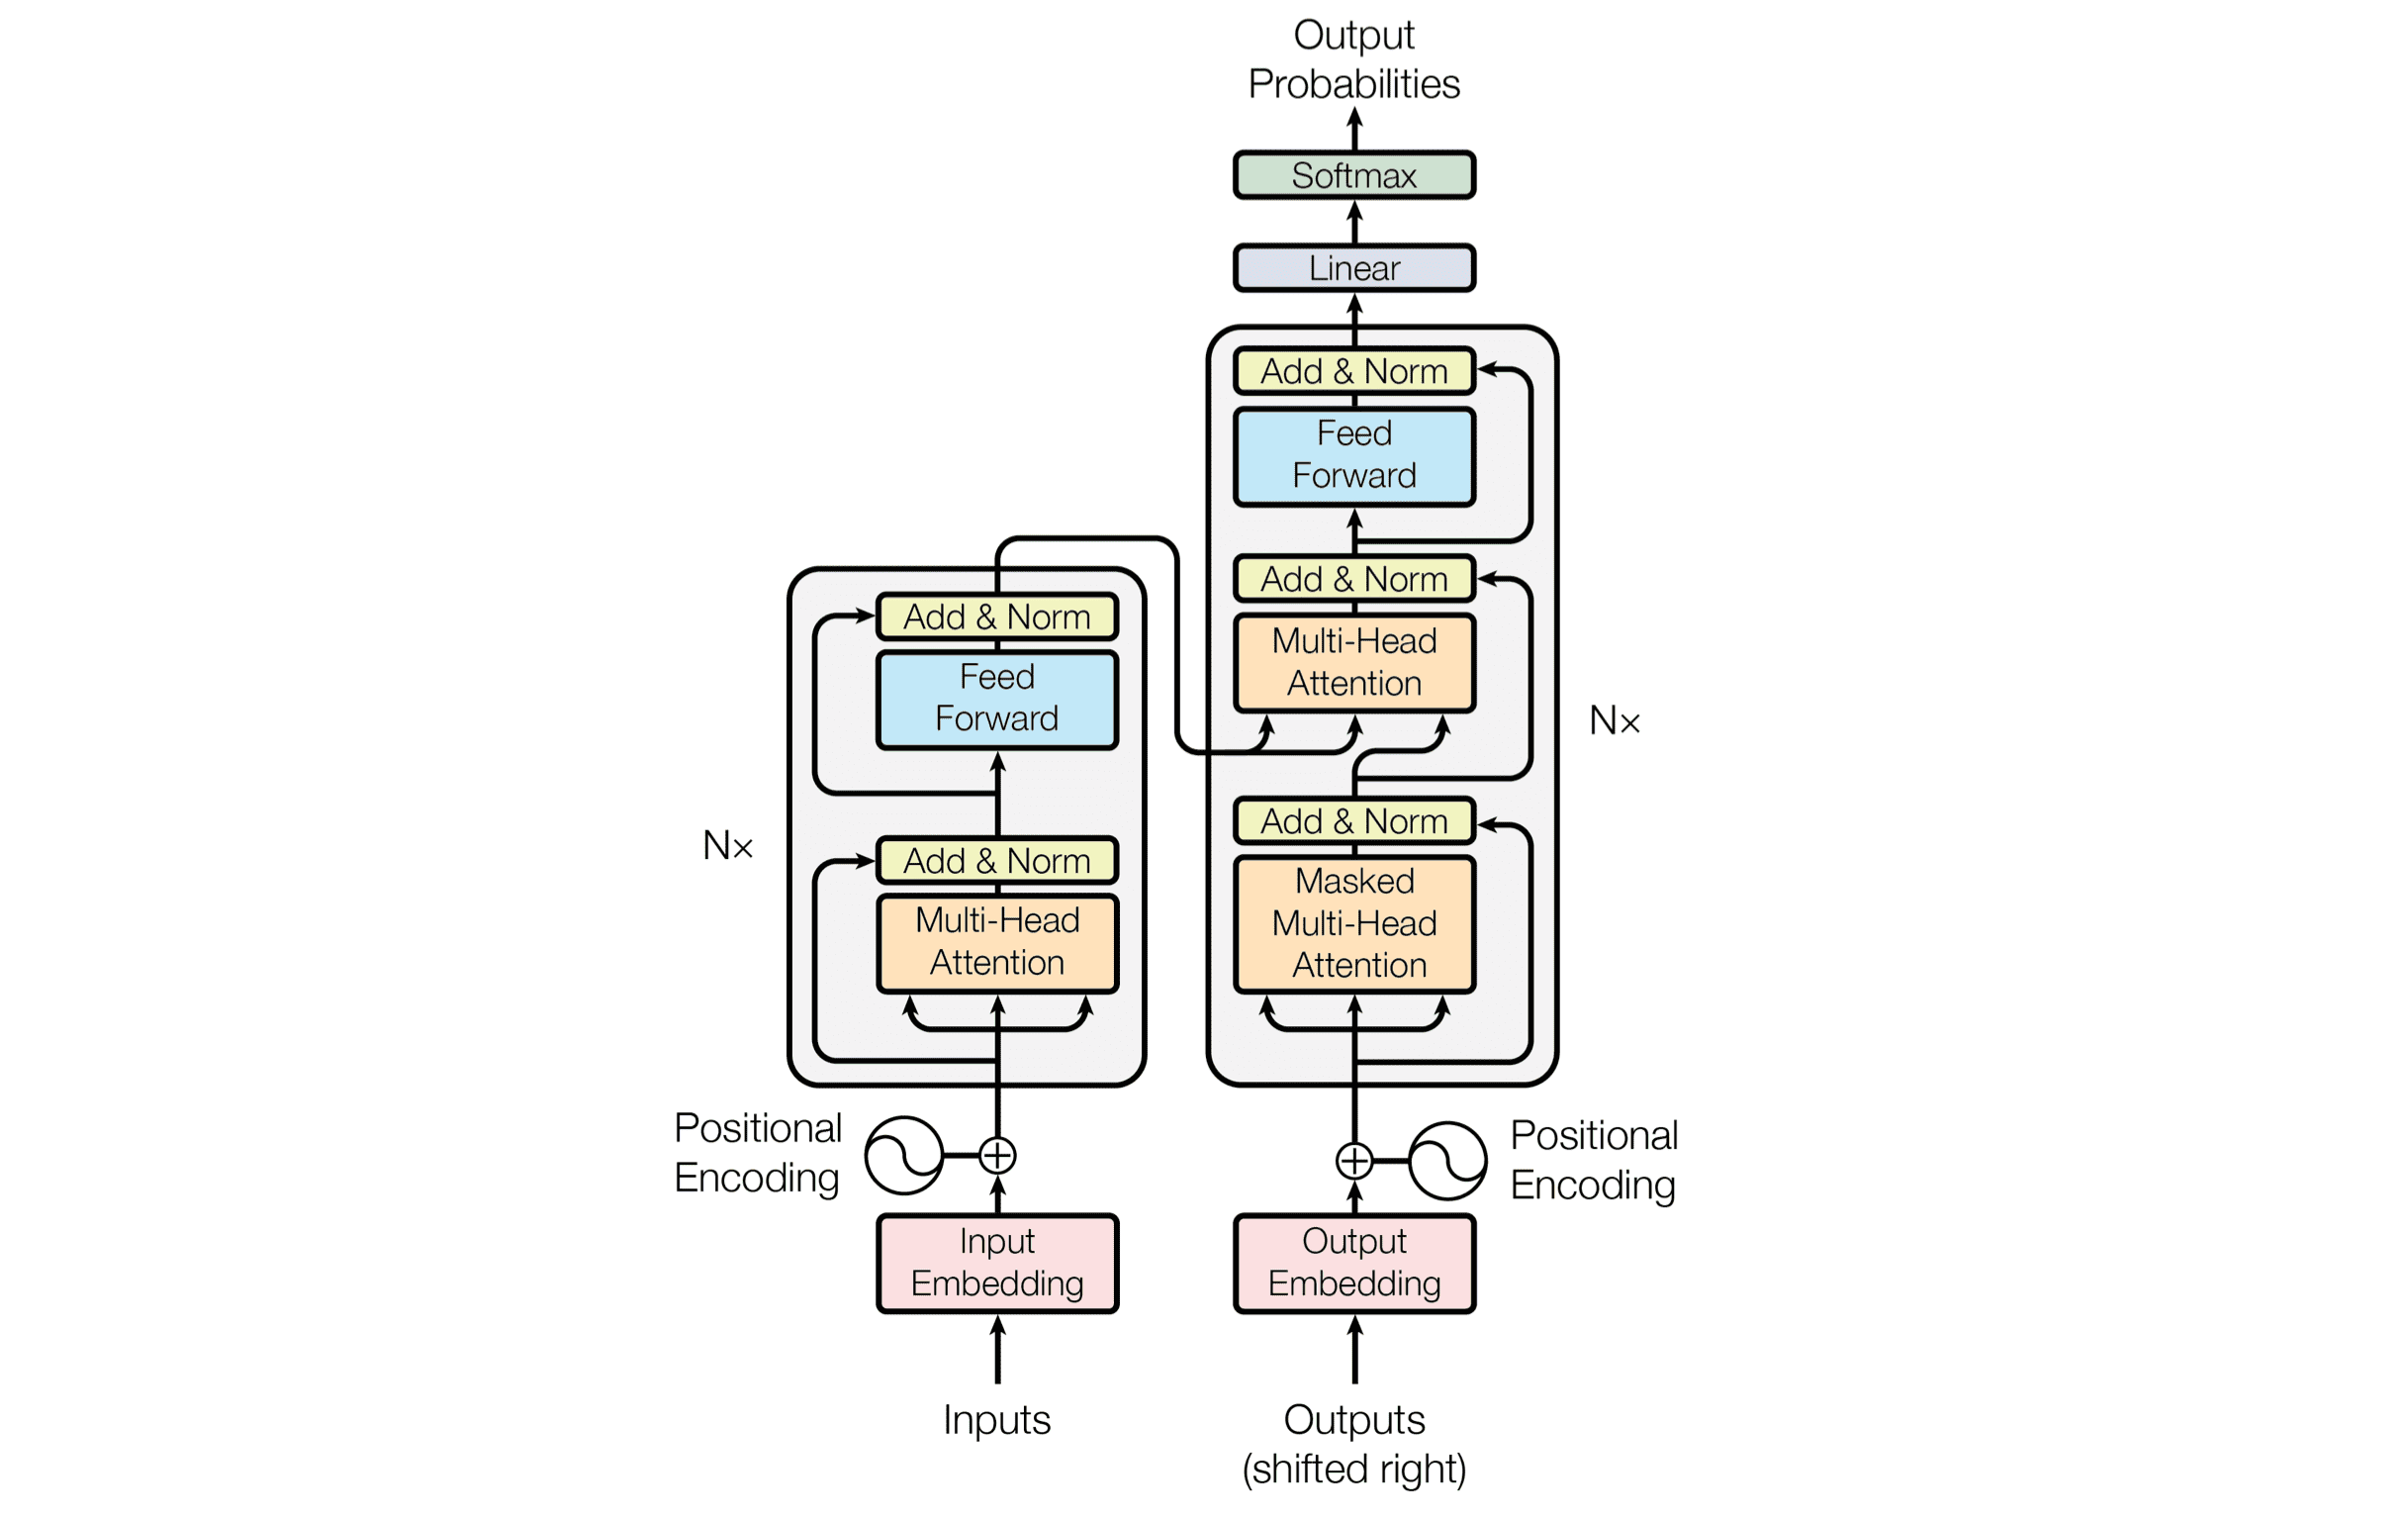

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Step 1: Input text
text = " I am Harsh Shelke studying in UI"




In [ ]:
# Step 2: Load tokenizer and model (we'll use BERT as an example)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:

# Step 3: Tokenization
tokens = tokenizer.tokenize(text)
print("🔹 Tokens:", tokens)


🔹 Tokens: ['i', 'am', 'harsh', 'she', '##lke', 'studying', 'in', 'ui']


In [ ]:

token_ids = tokenizer.convert_tokens_to_ids(tokens)
print("🔹 Token IDs:", token_ids)


🔹 Token IDs: [1045, 2572, 8401, 2016, 28143, 5702, 1999, 21318]


In [ ]:

# Step 5: Convert token IDs to input tensor
inputs = tokenizer(text, return_tensors="pt")  # automatically adds special tokens like [CLS] and [SEP]
print(inputs)

{'input_ids': tensor([[  101,  1045,  2572,  8401,  2016, 28143,  5702,  1999, 21318,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:

# Step 6: Generate embeddings from the model
with torch.no_grad():
    outputs = model(**inputs)

# print(outputs)


In [ ]:

# Step 7: Extract embeddings (from the last hidden state)
#Shape: [batch_size, sequence_length, embedding_dimension]
embeddings = outputs.last_hidden_state

print("🔹 Embeddings shape:", embeddings.shape)


🔹 Embeddings shape: torch.Size([1, 10, 768])


In [ ]:

# Optional: View embeddings of each token
for token, embedding_vector in zip(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]), embeddings[0]):
    print(f"{token:10s} → Embedding vector shape: {embeddings.shape}")


[CLS]      → Embedding vector shape: torch.Size([1, 10, 768])
i          → Embedding vector shape: torch.Size([1, 10, 768])
am         → Embedding vector shape: torch.Size([1, 10, 768])
harsh      → Embedding vector shape: torch.Size([1, 10, 768])
she        → Embedding vector shape: torch.Size([1, 10, 768])
##lke      → Embedding vector shape: torch.Size([1, 10, 768])
studying   → Embedding vector shape: torch.Size([1, 10, 768])
in         → Embedding vector shape: torch.Size([1, 10, 768])
ui         → Embedding vector shape: torch.Size([1, 10, 768])
[SEP]      → Embedding vector shape: torch.Size([1, 10, 768])


In [ ]:
for token, embedding_vector in zip(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]), embeddings[0]):
    print(f"{token:10s} → Embedding vector shape: {embedding_vector.shape}")

[CLS]      → Embedding vector shape: torch.Size([768])
i          → Embedding vector shape: torch.Size([768])
am         → Embedding vector shape: torch.Size([768])
harsh      → Embedding vector shape: torch.Size([768])
she        → Embedding vector shape: torch.Size([768])
##lke      → Embedding vector shape: torch.Size([768])
studying   → Embedding vector shape: torch.Size([768])
in         → Embedding vector shape: torch.Size([768])
ui         → Embedding vector shape: torch.Size([768])
[SEP]      → Embedding vector shape: torch.Size([768])


In [ ]:

# Input text
text = "ChatGPT is smart."

# Tokenize and convert to tensor
inputs = tokenizer(text, return_tensors="pt")

# Forward pass to get embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Extract embeddings (last hidden state)
# Shape: [1, sequence_length, embedding_dim]
embeddings = outputs.last_hidden_state

# Optional: Convert to one sentence vector by averaging token embeddings (excluding [CLS] and [SEP])
sentence_embedding = embeddings[0][1:-1].mean(dim=0)

print("🔹 Sentence embedding shape:", sentence_embedding.shape)
print("🔹 Sentence embedding (first 5 values):", sentence_embedding[:20])


🔹 Sentence embedding shape: torch.Size([768])
🔹 Sentence embedding (first 5 values): tensor([-3.5420e-02, -7.3610e-01,  4.7085e-01,  2.1736e-02,  3.8991e-01,
        -4.8422e-01, -5.7247e-02,  9.9099e-01, -2.0726e-01, -5.0394e-01,
        -5.4019e-02, -2.6955e-01, -3.6944e-01,  2.0692e-01, -1.2190e-01,
         4.6519e-04,  1.2472e-01,  2.4816e-01, -2.7236e-01, -3.5470e-02])


🧠 What is Positional Encoding?

Transformers have no recurrence or convolution, so they need a way to capture  

token order. Positional Encoding adds a unique vector to each token’s embedding based on its position in the sequence

$$
PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}}\right) \\
PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
$$


Shape: torch.Size([50, 512])


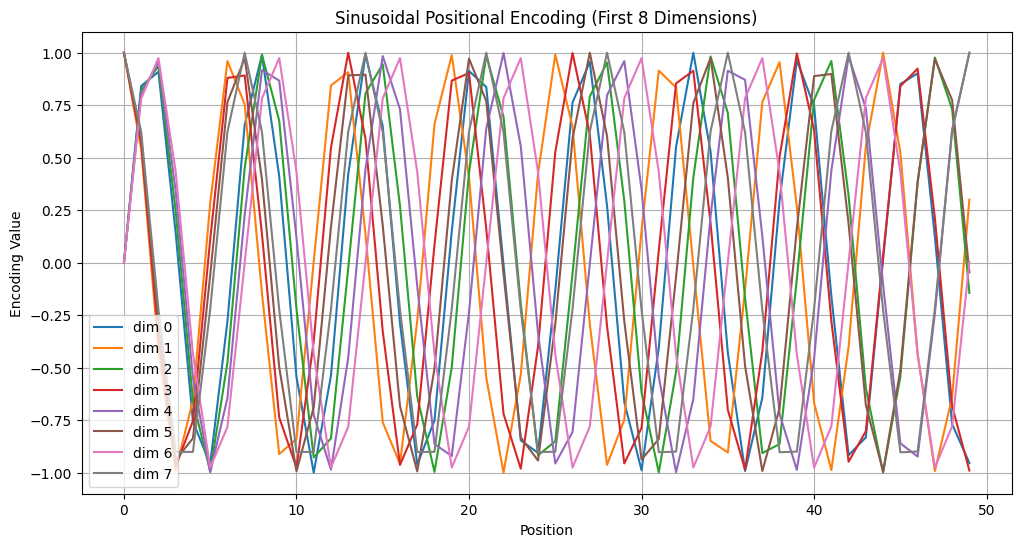

In [ ]:
import torch
import math
import matplotlib.pyplot as plt

def get_positional_encoding(seq_len, d_model):
    # Create a matrix of shape [seq_len, d_model]
    pos_encoding = torch.zeros(seq_len, d_model)

    # Create a tensor with positions [0, 1, ..., seq_len - 1]
    positions = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)

    # Compute the div term (used in the denominator of the angle calculation)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

    # Apply sin to even indices and cos to odd indices
    pos_encoding[:, 0::2] = torch.sin(positions * div_term)
    pos_encoding[:, 1::2] = torch.cos(positions * div_term)

    return pos_encoding

# Example usage
seq_len = 50        # max sequence length
d_model = 512       # embedding dimension
pos_encoding = get_positional_encoding(seq_len, d_model)

print("Shape:", pos_encoding.shape)  # [50, 512]

# Plot for visualization
plt.figure(figsize=(12, 6))
plt.plot(pos_encoding[:, :8])  # Plot first 8 dimensions
plt.title("Sinusoidal Positional Encoding (First 8 Dimensions)")
plt.xlabel("Position")
plt.ylabel("Encoding Value")
plt.legend([f"dim {i}" for i in range(8)])
plt.grid(True)
plt.show()


Shape: (7, 8)


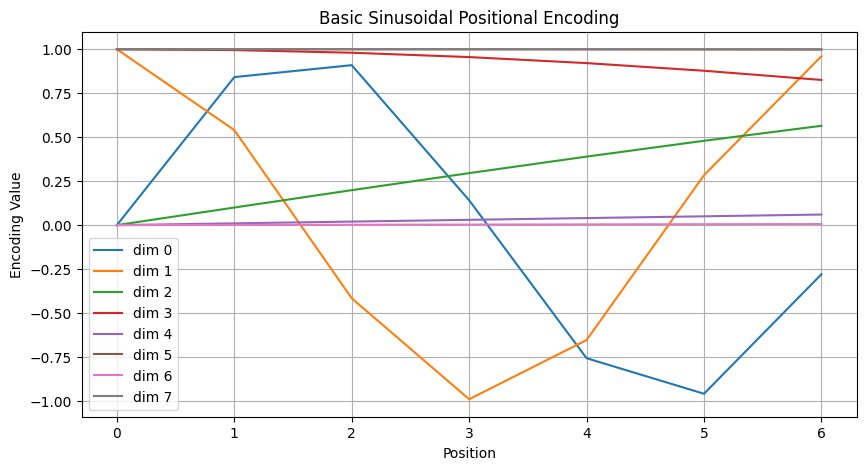

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def basic_positional_encoding(seq_len, d_model):
    pos_encoding = np.zeros((seq_len, d_model))

    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            angle = pos / (10000 ** (i / d_model))
            pos_encoding[pos, i] = np.sin(angle)  # Even index
            if i + 1 < d_model:
                pos_encoding[pos, i + 1] = np.cos(angle)  # Odd index

    return pos_encoding

# Parameters
seq_len = 7     # number of positions (e.g., 20 words)
d_model = 8       # embedding dimensions

# Generate positional encodings
encoding = basic_positional_encoding(seq_len, d_model)

# Print shape
print("Shape:", encoding.shape)  # (20, 8)

# Plot
plt.figure(figsize=(10, 5))
for i in range(d_model):
    plt.plot(encoding[:, i], label=f"dim {i}")
plt.xlabel("Position")
plt.ylabel("Encoding Value")
plt.title("Basic Sinusoidal Positional Encoding")
plt.legend()
plt.grid(True)
plt.show()


Tokens: ['I', 'am', 'ashvinkumar', 'bari', 'i', 'can', 'wrok', 'on', 'AI', 'project']

Positional Encoding Shape: (10, 10)

Positional Encodings: [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  1.57826640e-01  9.87466836e-01
   2.51162229e-02  9.99684538e-01  3.98106119e-03  9.99992076e-01
   6.30957303e-04  9.99999801e-01]
 [ 9.09297427e-01 -4.16146837e-01  3.11697146e-01  9.50181503e-01
   5.02165994e-02  9.98738351e-01  7.96205928e-03  9.99968302e-01
   1.26191435e-03  9.99999204e-01]
 [ 1.41120008e-01 -9.89992497e-01  4.57754548e-01  8.89078609e-01
   7.52852930e-02  9.97162035e-01  1.19429312e-02  9.99928681e-01
   1.89287090e-03  9.99998209e-01]
 [-7.56802495e-01 -6.53643621e-01  5.92337725e-01  8.05689779e-01
   1.00306487e-01  9.94956586e-01  1.59236138e-02  9.99873211e-01
   2.52382670e-03  9.99996815e-01]
 [-9.58924275e-01  

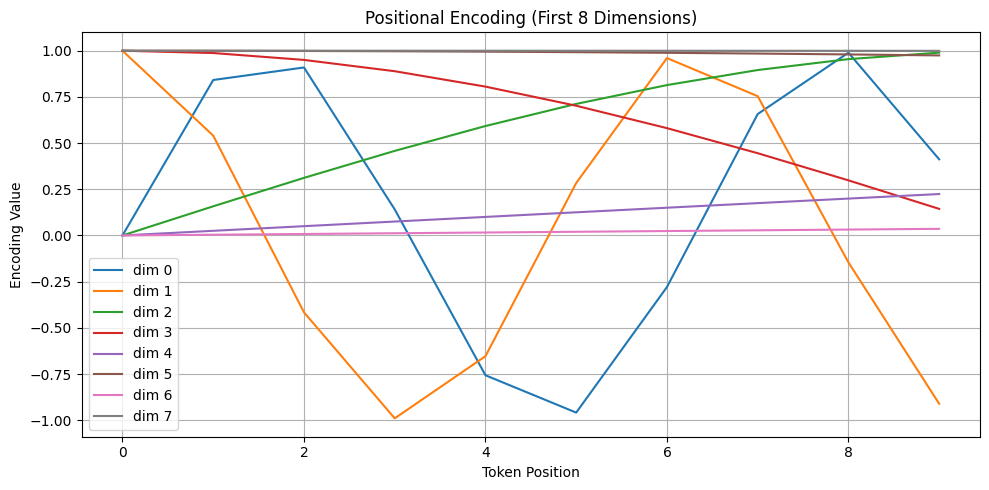

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len, d_model):
    pos_enc = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            angle = pos / (10000 ** (i / d_model))
            pos_enc[pos, i] = np.sin(angle)
            if i + 1 < d_model:
                pos_enc[pos, i + 1] = np.cos(angle)
    return pos_enc

# Step 1: Input text
text = "I am ashvinkumar bari  i can wrok on AI project "
tokens = text.split()
seq_len = len(tokens)
d_model = 10
  # Embedding dimension (choose 16 for easy visualization)

# Step 2: Dummy word embeddings (zeros or random)
word_embeddings = np.random.rand(seq_len, d_model)  # You can use np.zeros(...) for simplicity

# Step 3: Generate positional encodings
pos_enc = positional_encoding(seq_len, d_model)

# Step 4: Combine embeddings + positional encodings
final_embeddings = word_embeddings + pos_enc

# Step 5: Print info
print("Tokens:", tokens)
print("\nPositional Encoding Shape:", pos_enc.shape)
print("\nPositional Encodings:", pos_enc)
print("\nFinal Embeddings (with Positional Encoding):")
for i, token in enumerate(tokens):
    print(f"{token:12s} → {final_embeddings[i]}")

# Step 6: Plot positional encodings (first 8 dimensions)
plt.figure(figsize=(10, 5))
for i in range(8):
    plt.plot(pos_enc[:, i], label=f"dim {i}")
plt.title("Positional Encoding (First 8 Dimensions)")
plt.xlabel("Token Position")
plt.ylabel("Encoding Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Add Normalization

output = LayerNorm(x + SubLayer(x))

In [ ]:
import torch
import torch.nn as nn

class AddNorm(nn.Module):
    def __init__(self, hidden_dim, eps=1e-6):
        super(AddNorm, self).__init__()
        self.layer_norm = nn.LayerNorm(hidden_dim, eps=eps)

    def forward(self, x, sublayer_output):
        # Residual connection + Layer Normalization
        return self.layer_norm(x + sublayer_output)



In [ ]:
# Define dimensions
batch_size = 2
seq_len = 4
hidden_dim = 8

# Dummy input tensor (x)
x = torch.rand(batch_size, seq_len, hidden_dim)

# Simulate output from some sublayer (like self-attention or FFN)
sublayer_output = torch.rand(batch_size, seq_len, hidden_dim)

# Create the Add & Norm layer
add_norm = AddNorm(hidden_dim)

# Forward pass
output = add_norm(x, sublayer_output)

print("Output shape:", output.shape)
print("Output:", output)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
`
class MaskedMultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MaskedMultiHeadAttention, self).__init__()
        assert embed_dim % num_heads == 0, "Embedding dim must be divisible by num_heads"

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Linear projections for Q, K, V
        self.q_proj = nn.Linear(embed_dim, embed_dim)
        self.k_proj = nn.Linear(embed_dim, embed_dim)
        self.v_proj = nn.Linear(embed_dim, embed_dim)
        self.out_proj = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        B, T, E = x.shape  # Batch, Time, Embedding
        H = self.num_heads
        D = self.head_dim

        # Linear projections
        q = self.q_proj(x).view(B, T, H, D).transpose(1, 2)  # (B, H, T, D)
        k = self.k_proj(x).view(B, T, H, D).transpose(1, 2)  # (B, H, T, D)
        v = self.v_proj(x).view(B, T, H, D).transpose(1, 2)  # (B, H, T, D)

        # Scaled dot-product attention
        scores = torch.matmul(q, k.transpose(-2, -1)) / (D ** 0.5)  # (B, H, T, T)

        # Mask: prevent attending to future tokens
        mask = torch.tril(torch.ones(T, T, device=x.device)).unsqueeze(0).unsqueeze(0)  # (1, 1, T, T)
        scores = scores.masked_fill(mask == 0, float('-inf'))  # Causal mask

        attn = F.softmax(scores, dim=-1)  # (B, H, T, T)
        out = torch.matmul(attn, v)  # (B, H, T, D)

        # Concatenate heads
        out = out.transpose(1, 2).contiguous().view(B, T, E)  # (B, T, E)
        return self.out_proj(out)

# Example usage
batch_size = 2
seq_len = 5
embed_dim = 32
num_heads = 4

x = torch.rand(batch_size, seq_len, embed_dim)  # dummy input
masked_attn = MaskedMultiHeadAttention(embed_dim, num_heads)
out = masked_attn(x)

print(out.shape)  # Expected: (2, 5, 32)
